#### Assi-3 Write a program to implement Support Vector Machine Algorithm to solve classification problem.

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('Datasets\dementia_dataset.csv')

# Display the first few rows to understand the data
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


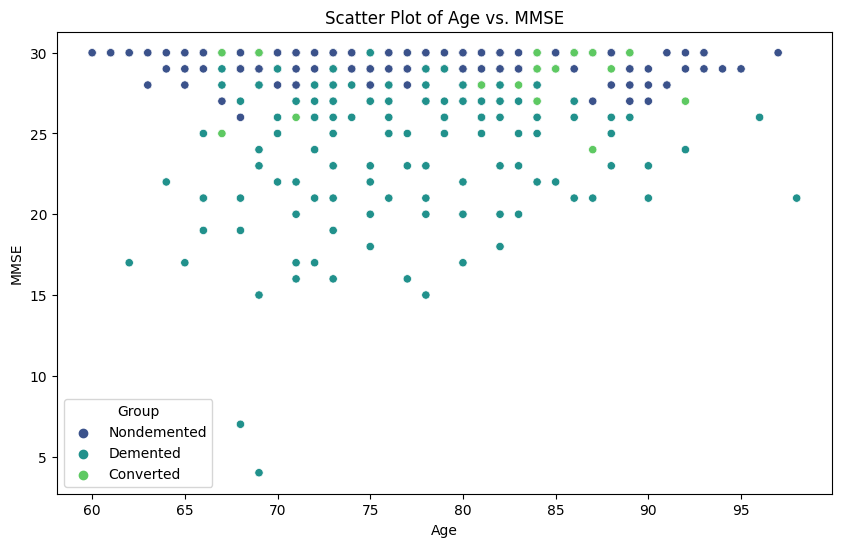

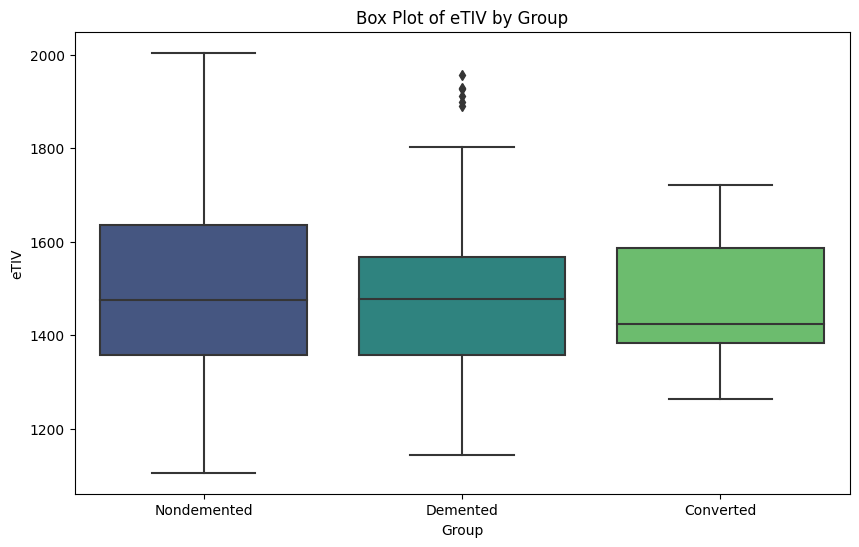

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the data is already loaded into a pandas DataFrame named df
# df = pd.read_csv('your_data_file.csv')  # Uncomment this line if you are loading from a CSV file

# Convert relevant columns to numeric if they are not already
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['MMSE'] = pd.to_numeric(df['MMSE'], errors='coerce')
df['eTIV'] = pd.to_numeric(df['eTIV'], errors='coerce')

# Plot 1: Scatter plot of Age vs. MMSE colored by Group
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='MMSE', hue='Group', palette='viridis')
plt.title('Scatter Plot of Age vs. MMSE')
plt.xlabel('Age')
plt.ylabel('MMSE')
plt.legend(title='Group')
plt.show()

# Plot 2: Box plot of eTIV grouped by Group
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Group', y='eTIV', palette='viridis')
plt.title('Box Plot of eTIV by Group')
plt.xlabel('Group')
plt.ylabel('eTIV')
plt.show()


In [3]:
# Encode categorical variables (e.g., 'M/F', 'Hand')
df['M/F'] = df['M/F'].map({'M': 1, 'F': 0})  # Male = 1, Female = 0
df['Hand'] = df['Hand'].map({'R': 1, 'L': 0})  # Right-handed = 1, Left-handed = 0

# Drop irrelevant columns
X = df.drop(columns=['Subject ID', 'MRI ID', 'Group'])  # 'Group' will be our target variable

# Handle missing values by imputing (using mean strategy here)
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Encode target variable ('Group')
y = df['Group'].apply(lambda x: 1 if x == 'Demented' else 0)  # Demented = 1, Nondemented = 0

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.96
